# TUTORIAL OF TENSORFLOW API 01 ==> MINIST 

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

## 1_Download and Load dataset

In [2]:
mnist = keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

## 2_Explore dataset

In [5]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train[0].shape)
print(x_test[0])

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(28, 28)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.     

## 3_Normalize dataset

In [4]:
x_train, x_test = x_train/255.0, x_test/255.0
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

## 4_Plot to visualize some examples dataset

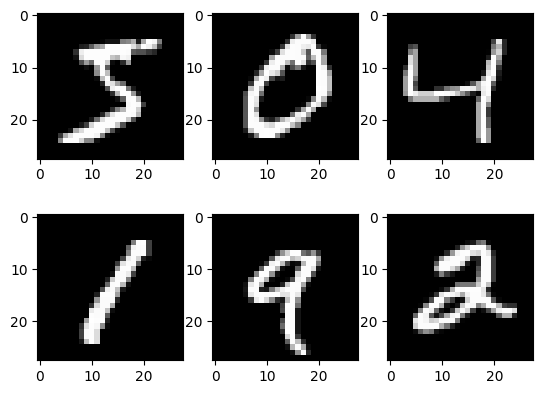

In [5]:
for i in range(6):
    plt.subplot(2,3, i+1)
    plt.imshow(x_train[i], cmap='gray')
plt.show()

## 5_Build Model

In [6]:
model1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28,28), name='input1'),
    keras.layers.Dense(128, activation='relu', name='dense1'),
    keras.layers.Dense(10, name='dense2')
])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input1 (Flatten)            (None, 784)               0         
                                                                 
 dense1 (Dense)              (None, 128)               100480    
                                                                 
 dense2 (Dense)              (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [ ]:
# model2 = keras.Sequential()
# model2.add(keras.layers.Flatten(input_shape=(28,28), name='input1'))
# model2.add(keras.layers.Dense(128, activation='relu', name='dense2'))
# model2.add(keras.layers.Dense(10, name='dense3'))
# print(model2.summary())

## 6_Select Hyperparameters for Model

In [7]:
loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True)
optimizer = keras.optimizers.Adam(learning_rate=0.001)
metrics = ["accuracy"]

model1.compile(loss=loss, metrics=metrics, optimizer=optimizer)

batch_size = 64
epochs = 5
model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, shuffle=True, verbose=2)

Epoch 1/5
938/938 - 6s - loss: 0.3042 - accuracy: 0.9143 - 6s/epoch - 6ms/step
Epoch 2/5
938/938 - 2s - loss: 0.1391 - accuracy: 0.9597 - 2s/epoch - 2ms/step
Epoch 3/5
938/938 - 2s - loss: 0.0979 - accuracy: 0.9712 - 2s/epoch - 2ms/step
Epoch 4/5
938/938 - 2s - loss: 0.0735 - accuracy: 0.9782 - 2s/epoch - 2ms/step
Epoch 5/5
938/938 - 3s - loss: 0.0585 - accuracy: 0.9823 - 3s/epoch - 3ms/step


## 7_Evaluation Model

In [8]:
model1.evaluate(x_test, y_test, batch_size=batch_size, verbose=2)

157/157 - 0s - loss: 0.0832 - accuracy: 0.9739 - 473ms/epoch - 3ms/step


[0.08318828046321869, 0.9739000201225281]

## 8_Predict with Probability

In [15]:
probability_model = tf.keras.Sequential([
    model1,
    keras.layers.Softmax()
])
predictions1 = probability_model(x_test) # 10000 examples test
pred1 = predictions1[1] # check 1st_example test
print(pred1)
label1 = np.argmax(pred1)
print(label1)

tf.Tensor(
[1.6994992e-06 2.5938402e-04 9.9972856e-01 3.6601443e-06 9.0163472e-14
 1.3198139e-06 2.4546277e-06 1.6605387e-12 2.8708373e-06 6.1303368e-10], shape=(10,), dtype=float32)
2


In [17]:
predictions2 = model1(x_test)
predictions2 = tf.nn.softmax(predictions2)
pred2 = predictions2[1]
print(pred2)
label2 = np.argmax(pred2)
print(label2)

tf.Tensor(
[1.6994992e-06 2.5938402e-04 9.9972856e-01 3.6601443e-06 9.0163472e-14
 1.3198139e-06 2.4546277e-06 1.6605387e-12 2.8708373e-06 6.1303368e-10], shape=(10,), dtype=float32)
2


In [19]:
predictions2 = model1(x_test)
predictions2 = tf.nn.softmax(predictions2)
pred2 = predictions2[5:10] # check 5th -> 9th examples test
print(pred2)
label2 = np.argmax(pred2, axis=1)
print(label2)

tf.Tensor(
[[4.7070012e-07 9.8512894e-01 3.0514229e-05 1.8671466e-05 8.7120992e-05
  3.7317776e-07 2.0813134e-06 1.4317474e-02 3.6656961e-04 4.7800731e-05]
 [5.7411859e-10 1.6167735e-07 7.9416989e-09 3.9002231e-08 9.9890924e-01
  2.7244027e-06 2.3463866e-07 6.0545834e-05 1.0119170e-03 1.5134466e-05]
 [1.2493759e-06 1.8602719e-05 4.7423004e-05 5.1518757e-04 3.1123373e-03
  1.2787266e-05 1.6821380e-08 1.6655034e-04 4.9678670e-06 9.9612087e-01]
 [2.6665177e-05 1.0770741e-06 7.4593019e-04 4.7770857e-07 6.8841297e-03
  6.6317841e-03 9.7696459e-01 5.3490699e-06 8.7098368e-03 3.0173878e-05]
 [1.4196243e-08 7.1825351e-11 9.9702935e-10 6.5315711e-05 3.6556129e-03
  1.4615456e-08 1.0628336e-12 2.2116827e-03 4.3177640e-04 9.9363565e-01]], shape=(5, 10), dtype=float32)
[1 4 9 6 9]
